We can treat it as a regression problem because the the ordinal values for placement  represents continuous interval

We cannot use multiclass (logistic regression) due to assumption (collinearity) 
    - 1vs all
    
GOAL : i want to know which team composition yield best placement.
decision tree , tree based
exboost

go with pca?
- dimensional reduction using feature extraction would be good for 'unit' combinations
- explainability = x

## Modeling

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score

In [15]:
df = pd.read_csv('../datasets/placement_traits_df.csv', index_col = 0)
df.columns

Index(['Aatrox_1', 'Aatrox_2', 'Aatrox_3', 'Alchemist_1', 'Annie_1', 'Annie_2',
       'Annie_3', 'Ashe_1', 'Ashe_2', 'Ashe_3',
       ...
       'Yasuo_3', 'Yorick_1', 'Yorick_2', 'Yorick_3', 'Zed_1', 'Zed_2',
       'Zyra_1', 'Zyra_2', 'Zyra_3', 'placement'],
      dtype='object', length=231)

In [16]:
# features & Target

X = df.drop(['placement'], axis=1)
y = df['placement']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    random_state = 42)

In [18]:
# Instantiate and fit for scaled data

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

Decision Tree Classifier

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(Z_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Bagged Decision Trees

In [21]:
bdc = BaggingClassifier()
bdc.fit(Z_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [22]:
rfc = RandomForestClassifier()
rfc.fit(Z_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
ada = AdaBoostClassifier()
ada.fit(Z_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [35]:
xgb = XGBClassifier()
xgb.fit(Z_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [36]:
xgb_ovr = OneVsRestClassifier(XGBClassifier())
xgb_ovr.fit(Z_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='binary:logistic',
                                            

In [98]:
print(f'Decision Tree Train Score: {dtc.score(Z_train, y_train)}')
print(f'Decision Tree Test Score: {dtc.score(Z_test, y_test)}')
print('---------------------------------------------')
print(f'Bagged Decision Trees Train Score: {bdc.score(Z_train, y_train)}')
print(f'Bagged Decision Trees Test Score: {bdc.score(Z_test, y_test)}')
print('---------------------------------------------')
print(f'Random Forest Train Score: {rfc.score(Z_train, y_train)}')
print(f'Random Forest Test Score: {rfc.score(Z_test, y_test)}')
print('---------------------------------------------')
print(f'AdaBoost Train Score: {ada.score(Z_train, y_train)}')
print(f'AdaBoost Test Score: {ada.score(Z_test, y_test)}')
print('---------------------------------------------')
print(f'XGBoost Train Score: {xgb.score(Z_train, y_train)}')
print(f'XGBoost Forest Test Score: {xgb.score(Z_test, y_test)}')
print('---------------------------------------------')
print(f'XGBoost + One Vs Rest Train Score: {xgb_ovr.score(Z_train, y_train)}')
print(f'XGBoost + One Vs Rest Test Score: {xgb_ovr.score(Z_test, y_test)}')

Decision Tree Train Score: 0.9861005812484205
Decision Tree Test Score: 0.20166793025018953
---------------------------------------------
Bagged Decision Trees Train Score: 0.974981046247157
Bagged Decision Trees Test Score: 0.21834723275208492
---------------------------------------------
Random Forest Train Score: 0.9861005812484205
Random Forest Test Score: 0.24260803639120546
---------------------------------------------
AdaBoost Train Score: 0.29214051048774325
AdaBoost Test Score: 0.266868840030326
---------------------------------------------
XGBoost Train Score: 0.8589840788476119
XGBoost Forest Test Score: 0.2441243366186505
---------------------------------------------
XGBoost + One Vs Rest Train Score: 0.8925954005559767
XGBoost + One Vs Rest Test Score: 0.24639878695981804


In [110]:
y_pred_dtc = dtc.predict(Z_test)
y_pred_bdc = bdc.predict(Z_test)
y_pred_rfc = rfc.predict(Z_test)
y_pred_ada = ada.predict(Z_test)
y_pred_xgb = xgb.predict(Z_test)


In [114]:
print(metrics.confusion_matrix(Z_test, y_pred_dtc))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [108]:

print(f'Decision Tree Test Score: {precision_score(y_test, y_pred_dtc)}')
print('---------------------------------------------')

print(f'Bagged Decision Trees Test Score: {bdc.score(Z_test, y_test)}')
print('---------------------------------------------')

print(f'Random Forest Test Score: {rfc.score(Z_test, y_test)}')
print('---------------------------------------------')

print(f'AdaBoost Test Score: {ada.score(Z_test, y_test)}')
print('---------------------------------------------')

print(f'XGBoost Forest Test Score: {xgb.score(Z_test, y_test)}')
print('---------------------------------------------')

print(f'XGBoost + One Vs Rest Test Score: {xgb_ovr.score(Z_test, y_test)}')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

(array([627., 676., 599., 585., 649., 696., 676., 768.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

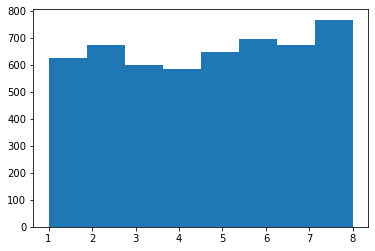

In [25]:
plt.hist(df.placement, bins= df.placement.max())

our dataset is imbalanced : more samples for placement = 8, less samples for placement = 4

In [26]:
# citation : https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()

In [11]:
#pip install -U imbalanced-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Multi-label and multioutput targets are not supported by imbalance-learn

In [38]:
# XX_train, XX_test = sm.fit_resample(X_train, X_test)

In [49]:
important_features = pd.DataFrame(list(xgb.feature_importances_), columns = ['importance'], index = X.columns)

In [94]:
important_features['importance'].sort_values(ascending=False)

Taric_2               0.012586
Avatar_1              0.011174
MasterYi_2            0.009948
Zed_2                 0.009873
Olaf_2                0.009198
                        ...   
Ashe_3                0.000000
Annie_3               0.000000
Lucian_3              0.000000
Set2_Blademaster_3    0.000000
Twitch_3              0.000000
Name: importance, Length: 230, dtype: float64

In [95]:
# feature plot

In [78]:
# In broader sense, Regularization (as any means to prevent overfit) for Trees is done by:

#limit max. depth of trees
#ensembles / bag more than just 1 tree
#set stricter stopping criterion on when to split a node further (e.g. min gain, number of samples etc.)
#specifying how many minimum data points are needed at each node for splitting (There can be various similar criteria).

## Optimization using GridSearchCV

Decision Trees

In [77]:
dtc_params = {'max_depth' : [5,10,20,35,50,70]}

gs_dtc = GridSearchCV(dtc, param_grid = dtc_params, cv = 5)
gs_dtc.fit(X_train, y_train)
gs_dtc.best_params_

{'max_depth': 35}

In [75]:
dtc_best = DecisionTreeClassifier(max_depth=20, random_state =42)
dtc_best.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [88]:
print(f'Decision Tree Train Score: {dtc_best.score(X_train, y_train)}')
print(f'Decision Tree Test Score: {dtc_best.score(X_test, y_test)}')
print('---------------------------------------------')

Decision Tree Train Score: 0.654030831437958
Decision Tree Test Score: 0.21834723275208492
---------------------------------------------


Random Forest

In [90]:
rfc_params = {'max_depth' : [5,10,20,35,50], # 20
              'n_estimators' : [5,10,20,50]} #50 maybe check upwards?

gs_rfc = GridSearchCV(rfc, param_grid = rfc_params, cv = 5)
gs_rfc.fit(X_train, y_train)
gs_rfc.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [92]:
rfc_best = RandomForestClassifier(max_depth=20, 
                         n_estimators=50, 
                         random_state =42)
rfc_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:

print(f'Random Forest Train Score: {rfc_best.score(X_train, y_train)}')
print(f'Random Forest Test Score: {rfc_best.score(X_test, y_test)}')
print('---------------------------------------------')

Random Forest Train Score: 0.9284811726055092
Random Forest Test Score: 0.2577710386656558
---------------------------------------------


XGBoost

In [82]:
xgb_params = {'max_depth' : [5,10,20,35,50], # 5
              'n_estimators' : [5,10,20,50]} # 50 maybe check upwards?

gs_xgb = GridSearchCV(xgb, param_grid = xgb_params, cv = 5)
gs_xgb.fit(X_train, y_train)
gs_xgb.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [86]:
xgb_best = XGBClassifier(max_depth=5, 
                         n_estimators=50, 
                         random_state =42)
xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [89]:

print(f'XGBoost Train Score: {xgb_best.score(X_train, y_train)}')
print(f'XGBoost Test Score: {xgb_best.score(X_test, y_test)}')
print('---------------------------------------------')

XGBoost Train Score: 0.6606014657568865
XGBoost Test Score: 0.244882486732373
---------------------------------------------
